<a href="https://colab.research.google.com/github/Adharsh0001/Fuel_Cell/blob/main/Fuel_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Importing the Package.                                        

2) Getting the Test demand.Unreal set demand

3) Splitting the data into list

In [2]:
#Importing Package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Fuel_Cell/main/Fuel%20Cell%20Demand%20Chart.csv")       # Trial 1 only with discharge demand
data = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Fuel_Cell/main/Fuel%20Cell%20Demand%20Chart_3.csv")       # Trial 2 with discharge and charge curve
data.head(10)                                                                                                                # Visualizing the recived data

# Getting the Speed, Torque and Time demand of each step into three various list
Speed = data.loc[:,"Speed (Assumption)"]
Torque = data.loc[:,"Torque (Assumption)"]
Time = data.loc[:,"Time"]

1) Basic details of the Hardware going to be used.

2) Safety Condition


In [3]:
Motor = {"Voltage":24,"Max_Current":7.5,"Max_Temp":60}
Fuel_Cell = {"Max_Voltage":36,"Min_Voltage":24,"Max_Pressure":0.7,"Min_Pressure":0.3,"Max_Temp":40}
Battery = {"Voltage":24,"Initial_SOC":100,"Min_SOC":20,"Max_Temp":40}
# Motor["Voltage"]                                                                                     #Access the value of Voltage from Motor dataset

# Safety Condition
Motor_Voltage = 36
Motor_Temp = 27
Fuel_Cell_Pressure = 0.7
Fuel_Cell_Temp = 27
FC_Status_inst = 50
FC_Capacity = 50
Battery_SOC = 30
SOC_CURR = 50
Battery_Temp = 27
Battery_Capacity = 30  #Ah

1) Analysing the demand chart downloaded

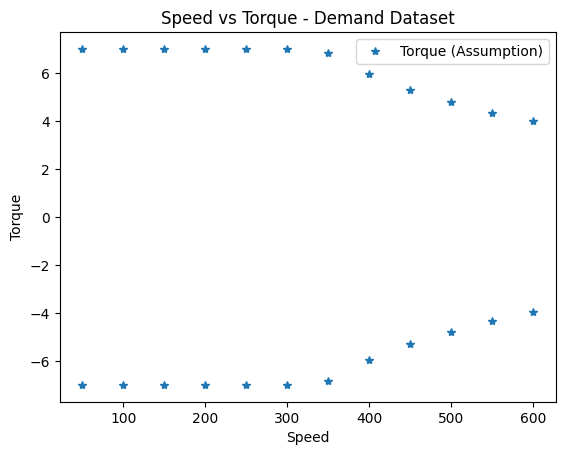

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


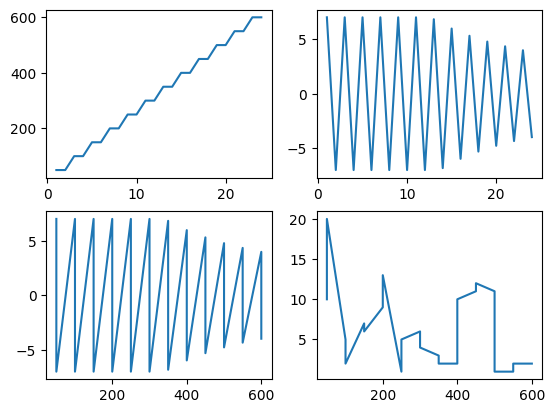

In [4]:
data.plot(x = "Speed (Assumption)", y = "Torque (Assumption)", style = "*")
plt.title("Speed vs Torque - Demand Dataset")
plt.xlabel("Speed")
plt.ylabel("Torque")
plt.show()

# Creating Charts
# Step Demand Vs Speed // Step Demand vs Torque // Speed Demand vs Torque // Speed vs Time
S_no =[]
Length_Data = len(Torque)
for A in range(0,Length_Data):
  S_no.append(A+1)                               #Creating an index common for all the list downloaded
#------------------------------------------------------------------------------------------------------
data1 = data                                     # Creating an duplicate of the dataset
data1["S_no"] = S_no                             # Adding the created index to the duplicate dataset
figure, data1 = plt.subplots(2,2)                # Creating subplots to visualize the charts 
data1[0,0].plot(S_no ,Speed)                      
data1[0,1].plot(S_no ,Torque)
data1[1,0].plot(Speed ,Torque)
data1[1,1].plot(Speed,Time)
plt.show()

1) Calculation Part

In [ ]:
# Initiating the system through Battery

def Battery_Start():
  Time_Initiate = 0
  Time_Initiate_DF = []
  SOC_CURRENT_DF = []
  SOC_CURR = 50
  Constant_Load_Initiate = 0.5     #A/s
  Current_Initiate = 0 
  if(Motor_Temp <= Motor["Max_Temp"] and Fuel_Cell_Pressure >= Fuel_Cell["Min_Pressure"] and Fuel_Cell_Pressure <= Fuel_Cell["Max_Pressure"] and Fuel_Cell_Temp <= Fuel_Cell["Max_Temp"] and SOC_CURR >= 20 and Battery_Temp <= Battery["Max_Temp"]):
    while Time_Initiate < 5:
      Current_Initiate = Current_Initiate + Constant_Load_Initiate
      Time_Initiate = Time_Initiate+1
      Time_Initiate_DF.append(Time_Initiate)
      SOC_CURRENT_DF.append(Current_Initiate)
    SOC_CURR = (((SOC_CURR/100)*Battery_Capacity) - (Current_Initiate/3600))/(Battery_Capacity)*100
  plt.plot(Time_Initiate_DF, SOC_CURRENT_DF)
  plt.show()
  print("Current SOC of Battery after powering up the system is ",SOC_CURR,"after",Time_Initiate)
  return SOC_CURR

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initiating the system through Fuel Cell

def FC_Start():
  Time_Initiate = 0
  Time_Initiate_DF = []
  FC_Status = []
  Constant_Load_Initiate = 0.5     #A/s
  Current_Initiate = 0 
  if(Motor_Temp <= Motor["Max_Temp"] and Fuel_Cell_Pressure >= Fuel_Cell["Min_Pressure"] and Fuel_Cell_Pressure <= Fuel_Cell["Max_Pressure"] and Fuel_Cell_Temp <= Fuel_Cell["Max_Temp"] and SOC_CURRENT >= 20 and Battery_Temp <= Battery["Max_Temp"]):
    while Time_Initiate < 5:
      Current_Initiate = Current_Initiate + Constant_Load_Initiate
      Time_Initiate = Time_Initiate+1
      Time_Initiate_DF.append(Time_Initiate)
      FC_Status.append(Current_Initiate)
    FC_Status_P = ((((FC_Status_inst/100)*FC_Capacity) - (Current_Initiate/3600))/FC_Capacity)*100
  plt.plot(Time_Initiate_DF, FC_Status)
  plt.show()
  Cycle = 1
  print("Current FC Status after powering up the system is ",FC_Status_P, "after",Time_Initiate)
  return FC_Status_P,Cycle

#----------------------------------------------------------------------------------------------------------------------------------------------------
# Sub-Cycles
def FC_Runs(FC_Charge_Level,Ti_Sec,Current):
  A = []
  B = []
  for i in range(0, int(Ti_Sec)):
    FC_Charge_Level = ((((FC_Charge_Level/100)*FC_Capacity)-(Current/3600))/FC_Capacity)*100
  return FC_Charge_Level

def Regeneration(SOC_CURRENT,Current,Ti_Sec):
  for i in range(0,int(Ti_Sec)):
    if SOC_CURRENT < 100:
      SOC_CURRENT = ((((SOC_CURRENT/100)*(Battery_Capacity)) + (-Current/3600))/(Battery_Capacity))*100
    else:
      print("Battery is full")
  return (SOC_CURRENT)

def Bt_Assists(SOC_CURRENT, Bt_Current, Ti_Sec):
  for i in range(0,int(Ti_Sec)):
    SOC_CURRENT = ((((SOC_CURRENT/100)*(Battery_Capacity)) - (Bt_Current/3600))/(Battery_Capacity))*100
    if SOC_CURRENT < 20:
      break
  return (SOC_CURRENT)

def Battery_Assists(FC_Charge_Level,SOC_CURRENT,Current,Ti_Sec):
  for i in range(0,int(Ti_Sec)):
    FC_Charge_Level = FC_Runs(FC_Charge_Level,Ti_Sec,7.5)
    Bt_Current = Current - 7.5
    if(SOC_CURRENT > 20):
      SOC_CURRENT = Bt_Assists(SOC_CURRENT, Bt_Current, Ti_Sec)
  return (FC_Charge_Level, SOC_CURRENT)

# Cycle Start
def Cycle_Start(SOC_CURRENT,FC_Charge_Level):
  Steps = len(Speed)
  FC_Capacity_list =[]
  SOC_RESULT = []
  FC_RESULT = []
  STEP_NO = []
  for i in range(0,Steps):
    if((Motor_Temp <= Motor["Max_Temp"] and Fuel_Cell_Pressure >= Fuel_Cell["Min_Pressure"] and Fuel_Cell_Pressure <= Fuel_Cell["Max_Pressure"] and Fuel_Cell_Temp <= Fuel_Cell["Max_Temp"] and SOC_CURRENT >= 20 and Battery_Temp <= Battery["Max_Temp"]) or (Motor_Temp <= Motor["Max_Temp"] and Fuel_Cell_Pressure >= Fuel_Cell["Min_Pressure"] and Fuel_Cell_Pressure <= Fuel_Cell["Max_Pressure"] and Fuel_Cell_Temp <= Fuel_Cell["Max_Temp"] and Battery_Temp <= Battery["Max_Temp"])):
      #----------------------------------------------------------------------------------------------------------------------------------------------
      # Calculating Current from speed and torque
      S = Speed[i]                      #Getting the step speed demand
      T = Torque[i]                     #Getting the step torque demand
      Ti = Time[i]                      #Getting the Time of the step
      Power = (2*3.14*S*T)/60           #Calculating the power of the particular step 
      Current = Power/Motor_Voltage     #Calculating the current consumption of the particular step
      # print ("Current consumption for the step no ",i," ",Current)
      Ti_Sec = Ti*60                    #Converting time of the step from mins to secs
      Current = -10
      if Current > 0 and Current < 7.5:
        FC_Charge_Level = FC_Runs(FC_Charge_Level,Ti_Sec,Current)   
      elif Current < 0:
        SOC_CURRENT = Regeneration(SOC_CURRENT,Current,Ti_Sec)
      else:
        FC_Charge_Level, SOC_CURRENT = Battery_Assists(FC_Charge_Level,SOC_CURRENT,Current,Ti_Sec)
    # if SOC_CURRENT >20:
    #   print ("At the end of Test Cycle, the charges remaining are","FC_Charge_Level =",FC_Charge_Level," and ","Battery_SOC ="," ",SOC_CURRENT,"Step Number :",i)
    # else:
    #   print ("At the end of Test Cycle, the charges remaining are","FC_Charge_Level =",FC_Charge_Level," and ","Battery_SOC ="," Battery Low","Step Number :",i)

    SOC_RESULT.append(SOC_CURRENT)
    FC_RESULT.append(FC_Charge_Level)
    STEP_NO.append(i)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting the results
  SOC_DF = pd.DataFrame(SOC_RESULT,columns = ["SOC"])
  STEP_DF = pd.DataFrame(STEP_NO,columns = ["Step"])
  FC_RESULT_DF = pd.DataFrame(FC_RESULT,columns = ["FC"])
  plt.plot(STEP_DF, SOC_DF, color='r', label='SOC_DF')
  plt.plot(STEP_DF, FC_RESULT_DF, color='g', label='FC_RESULT_DF')
  plt.xlabel("Time_Series_DF")
  plt.ylabel("SOC and FC")
  plt.legend()
  plt.show()

  Result = STEP_DF.join(SOC_DF).join(FC_RESULT_DF)
  print(Result)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Printing the results
# for A in range (i+1):
#   print (SOC_RESULT[A]," ",FC_RESULT[A]," ",STEP_NO[A])
# Get the result in CSV format
# Result.to_csv("Results.csv")
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Initiating model 
Key_Dema = 10                                                            # This initiation is to keep the model in repeating condition
while Key_Dema == 10:
  Key_Dem = int(input(print("Enter the Key Demand")))                    # Getting the Ignition key condition to run the motor
  if Key_Dem == 1:                                                       
    if(Motor_Temp <= Motor["Max_Temp"] and Fuel_Cell_Pressure >= Fuel_Cell["Min_Pressure"] and Fuel_Cell_Pressure <= Fuel_Cell["Max_Pressure"] and Fuel_Cell_Temp <= Fuel_Cell["Max_Temp"] and Battery_SOC >= Battery["Min_SOC"] and Battery_Temp <= Battery["Max_Temp"]):
      SOC_CURRENT = Battery_Start()
      Cycle = 0
      while Cycle == 0:
        FC_Charge_Level,Cycle = FC_Start()
      while Cycle == 1:
        Cycle_Start(SOC_CURRENT,FC_Charge_Level)
        break
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Safety Alarms
    else:
      if(Motor_Temp > Motor["Max_Temp"]):
        print("Motor Temperature has crossed the safety limits")
      elif(Fuel_Cell_Pressure < Fuel_Cell["Min_Pressure"]):
        print("Fuel Cell Pressure has crossed the lower safety limits")
      elif(Fuel_Cell_Pressure > Fuel_Cell["Max_Pressure"]):
        print("Fuel Cell Pressure has crossed the higher safety limits")
      elif(Fuel_Cell_Temp > Fuel_Cell["Max_Temp"]):
        print("Fuel Cell Temp has crossed the safety limits")
      elif(Battery_SOC < Battery["Min_SOC"]):
        print("Battery has crossed the lower SOC safety limits")
      elif(Battery_Temp > Battery["Max_Temp"]):
        print("Battery Temperature has crossed the safety limits")
      else:
        print("Something gone wrong. Check the sensor inputs")
  else:
    print("Key is in Off Condition")
  print("Do You wish to Continue")
  Key_Dema = int(input())                                             # Used to repeat the model if operator gives 10 as an input
  #------------------------------------------------------------------------------------------------------------------------------------------------------
    


  